# CMSE201 Final Project
## Name: Lucas Connelly
## Section 003: Prof. Luciano Silvestri
## Spring Semester 2024

##  __Investigation of COVID-19's Effect on the Video Game Industry__

## 1.0 Background and Motivation

The video game industry has consistently demonstrated remarkable expansion and resilience through various global challenges. This sector, intertwined with advancements in technology, social media, and digital entertainment, has not only revolutionized the way people engage with digital content but has also become a significant part of the global economy. The onset of the COVID-19 pandemic in early 2020 marked a pivotal moment for industries worldwide, presenting both unprecedented challenges and opportunities for growth. Among these, the video game sector stood out, potentially benefiting from an extremely unique set of circumstances. 

As governments around the world implemented strict measures to curb the spread of the virus, including lockdowns and social distancing mandates, a significant shift occurred in daily routines. Workplaces and schools closed, and people turned to digital platforms for entertainment, social interaction, and escapism, potentially catalyzing a surge in video game engagement. This period of confinement is hypothesized to have accelerated the industry's growth, drawing in new players, increasing engagement among existing ones, and influencing the types of games that saw heightened popularity.

This study aims to delve into the dynamics of the video game sector during this unique period, examining how the pandemic-induced confinement impacted player engagement across various platforms. By analyzing player count data and industry trends from before, during, and after the peak periods of COVID-19 restrictions, we seek to understand not just the immediate effects but also the lasting impacts that COVID-19 may have. This analysis is critical not only for grasping the scale of the pandemic's influence on digital entertainment but also for forecasting future trends in the industry as it adapts to the post-pandemic world.

The research will specifically investigate whether the presumed spike in player engagement during the early months of the pandemic represents a temporary shift or has set the stage for sustained growth in the video game sector. Furthermore, it will explore how the industry's dynamics during this period reflect broader changes in digital media consumption and social interaction. As we stand at the intersection of technological innovation, cultural shifts, and a global pandemic, this study seeks to shed light on the evolving landscape of the video game industry and its role in shaping digital culture.

## 1.1 Importing the necessary libraries and datasets

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pmdarima import auto_arima
import scipy.stats as stats

revenue = pd.read_csv('monthly_revenue.csv', delimiter = ',')
twitch = pd.read_csv('twitch_viewership.csv', delimiter = ',')
valve = pd.read_csv('valve.csv', delimiter = ',')
covid_data = pd.read_csv('covid_data.csv', delimiter = ',')

In [21]:
valve

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,0.05,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,1.19,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,7654.89,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


In [22]:
revenue

,month_year,Total,Game Content,Hardware,Accessories,Software
0,Mar 2010,1.52,NaN,0.44,0.21,0.88
1,Apr 2010,0.77,NaN,0.25,0.12,0.40
2,May 2010,0.82,NaN,0.24,0.12,0.47
3,Jun 2010,1.10,NaN,0.40,0.17,0.53
4,Jul 2010,0.85,NaN,0.31,0.13,0.40
...,...,...,...,...,...,...
161,Aug 2023,4.20,3.72,0.33,0.16,NaN
162,Sep 2023,4.50,3.85,0.45,0.20,NaN
163,Oct 2023,4.04,3.56,0.33,0.15,NaN
164,Nov 2023,5.87,4.60,0.96,0.30,NaN


In [23]:
twitch

,year,minutes
0,2012,72
1,2013,144
2,2014,192
3,2015,241
4,2016,292
5,2017,355
6,2018,560
7,2019,660
8,2020,1116
9,2021,1460


In [24]:
covid_data

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
416,2020-01-16,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
417,2020-01-15,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
418,2020-01-14,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0


## 1.2 Looking at Twitch Viewership Data

For background, twitch.tv is a popular live streaming platform that initially gained fame within the gaming community but has since expanded to include a wide variety of content categories. It allows users to broadcast live video streams of themselves engaging in activities such as gaming, cooking, music, arts and crafts, and podcasts, among many others. Viewers can watch these streams in real-time, interact with the streamers and each other through a live chat feature, and even support their favorite broadcasters through donations and subscriptions. Twitch has become a social hub where individuals from around the world come together to form communities around shared interests.

Looking at the viewership over time may be able to tell us how people's behavior changed as a result of COVID-19. The data is of total minutes watched on the platform between its creation in 2012 and 2023. 

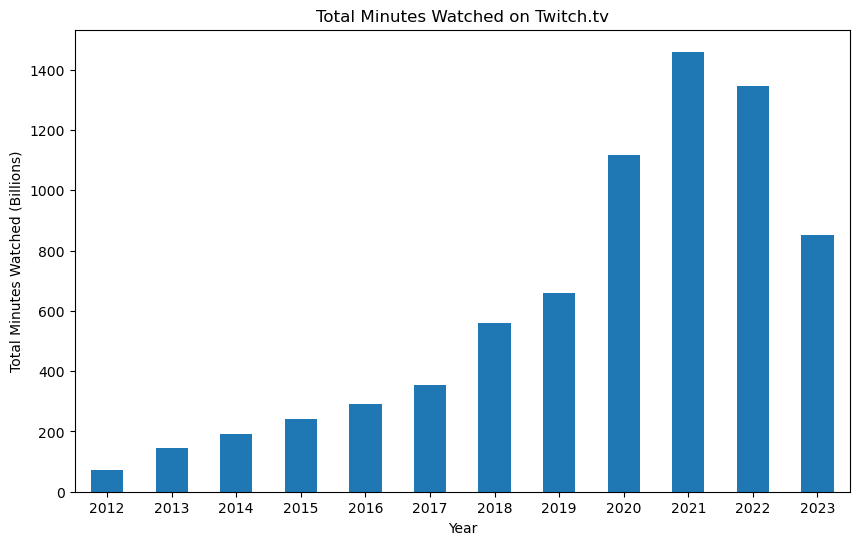

In [6]:
plt.figure(figsize=[10,6])
twitch.groupby('year')['minutes'].sum().plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Total Minutes Watched (Billions)')
plt.title("Total Minutes Watched on Twitch.tv")
plt.xticks(rotation = 0)
plt.show()

### Interpretation of Twitch Viewership Bar Graph
This graph brings up two interesting questions. Did COVID-19 have a direct effect on Twitch viewership, and will this be sustained as COVID-19's effect on the population tapers off? It is clear that in 2020 and 2021, there is a huge increase in the consumption of livestreams, but will it be sustained as time goes on? Unfortunately, this is something that we will have to wait to observe.

## 1.3 Analysis of Overall Average Player Count on Steam

### Background on Steam:

Valve Corporation launched Steam in September 2003 as a digital distribution platform, initially developed to provide automatic updates for their own games, notably titles like "Counter-Strike" and "Half-Life." Over time, Steam evolved to become a comprehensive storefront for PC gaming, offering game sales, software, hardware, and a community hub for gamers. This platform revolutionized the gaming industry by centralizing game distribution, which allowed for easier access to a vast array of games and significantly reduced piracy. Steam's introduction of features such as cloud saves, community forums, user profiles, in-game voice and chat functionality, and the Steam Workshop for mod-sharing contributed to its standing as a pivotal service in the PC gaming ecosystem. Its developer-friendly model also encouraged a broad range of publishers to distribute their games through Steam, thereby expanding its library and user base.

### Objective and Methodology:

The objective of analyzing the overall average player count is to assess the mean player engagement per game across the entire video game industry over the selected timeframe. This metric provides a centralized measure of activity that helps in understanding the general impact of external events, such as the COVID-19 pandemic, on player behavior and game popularity.

To compute the overall average player count, I aggregated player data across all games included in the dataset for each month within the study period. This approach allows for a broad analysis of trends without the influence of outliers associated with extremely popular or unpopular games.

The overall average player count per month was calculated by taking the mean of the average player counts from all games from their corresponding times.

In [7]:
valve['Date'] = pd.to_datetime(valve['Date'], errors='coerce')
monthly_avg_by_month_year = valve.groupby('Date')['Avg_players'].mean()
monthly_avg_by_month_year.sort_index(inplace=True)

### Time Series Analysis

The time series of the overall average player count was then plotted to visualize trends over time. This analysis helps to identify periods of significant increase or decrease in player engagement, correlating these trends with external events such as the onset of the COVID-19 pandemic.

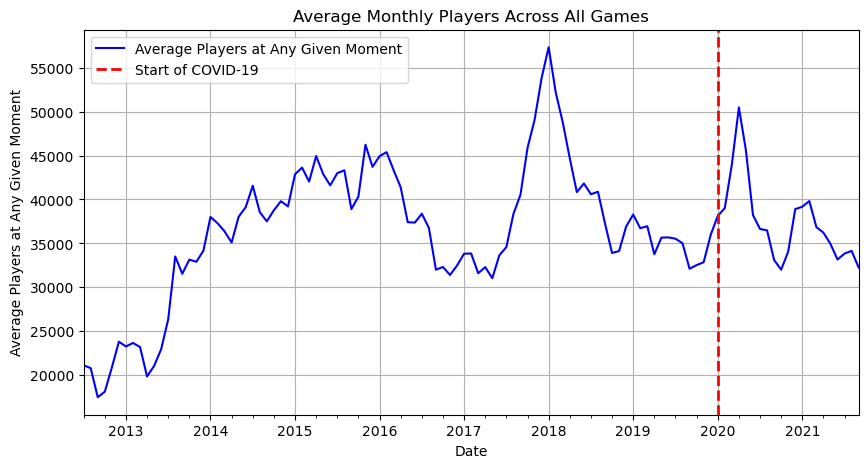

In [8]:
# Plot the trend of average players across all games over time
plt.figure(figsize=(10, 5))
monthly_avg_by_month_year.plot(title='Average Monthly Players Across All Games', color='b', label = 'Average Players at Any Given Moment')
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', lw=2, label = 'Start of COVID-19')
plt.xlabel('Date')
plt.ylabel('Average Players at Any Given Moment')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation of Steam's Average Players

The graph above displays the average players across the top 100 games as a whole at any given time. Interestingly, the average player count seems quite consistent over the years with exception for the 2018 spike and the COVID-19 spike.

## 1.4 Summed Average Player Count
### Methodology:
In addition to analyzing the overall monthly average of players per game, which provides insight into the typical player engagement for the non-existent 'average game', we further explore the summed total average of players. This metric aggregates the average monthly player counts across all games to provide a comprehensive measure of total player engagement within the video game industry. This summed total is particularly valuable for assessing the entire market's size and growth over time, offering a macroscopic view of gaming trends.

The summed total average is crucial for understanding broader market dynamics and for strategic planning purposes. It aids in determining the aggregate demand for video gaming, facilitating better resource allocation, marketing strategies, and investment decisions within the industry. By tracking the total player count over time, we can identify growth trends and forecast future developments, providing valuable insights for industry stakeholders aiming to capitalize on emerging opportunities or to mitigate potential risks.

This approach not only complements the analysis of average players per game by providing a holistic view of the industry's health but also serves as the basis for regression analyses aimed at predicting future player numbers. By modeling this comprehensive metric, we can generate robust projections that are essential for long-term planning and decision-making.

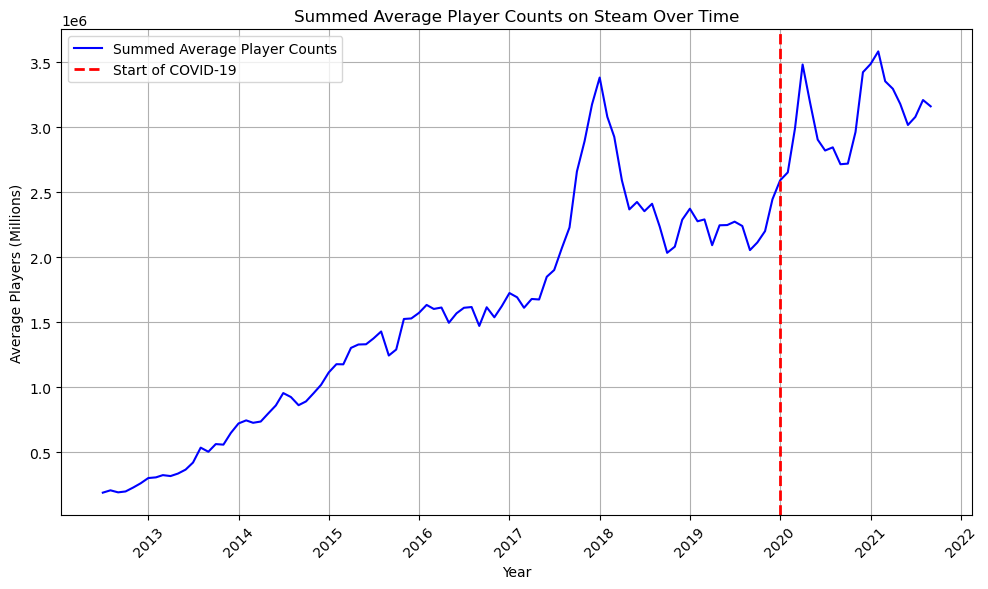

In [9]:
# Summarize player counts across all games for each time period
summary = valve.groupby('Date')['Avg_players'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(summary['Date'], summary['Avg_players'], linestyle='-', color='b', label = 'Summed Average Player Counts')
plt.title('Summed Average Player Counts on Steam Over Time')
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', lw=2, label = 'Start of COVID-19')
plt.xlabel('Year')
plt.ylabel('Average Players (Millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Interpration of Summed Average Players
This graph clearly demonstrates the steady increase of players on the platform. Although on average, the graph above suggests that the average players in any given game at any given time does not seem to change, the total raw amount of players who play per month does. 

## 1.5 Explanation of 2018 Player Count Spike, and Removal of the Game's Data

In 2018, the digital landscape of the gaming industry witnessed an unprecedented phenomenon that dramatically reshaped player engagement on global platforms, particularly on Steam. This pivotal moment was largely attributed to the meteoric rise of PlayerUnknown's Battlegrounds (PUBG), a game that not only captured the imagination of gamers worldwide but also set the stage for a new genre in the gaming industry. PUBG's emergence as a front-runner in the "battle royale" genre marked a significant turning point, characterized by its record-breaking concurrent player count that remains unsurpassed. A graph of PUBG's average player count is shown below for context. 

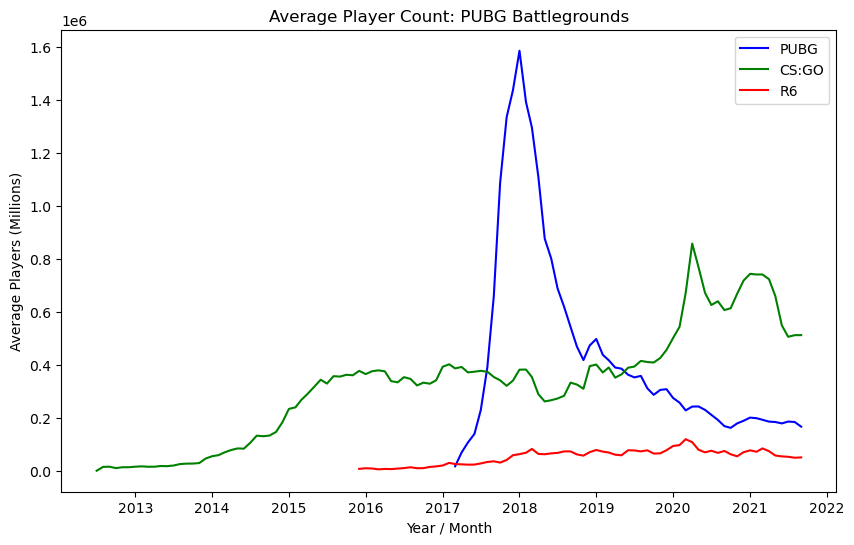

In [10]:
pubg_data = valve[valve['Game_Name'] == "PUBG: Battlegrounds"]
csgodata = valve[valve['Game_Name'] == "Counter Strike: Global Offensive"]
r6data = valve[valve['Game_Name'] == "Tom Clancy's Rainbow Six Seige"]
plt.figure(figsize=(10, 6))
plt.plot(pubg_data['Date'], pubg_data['Avg_players'], color='b', label = 'PUBG')
plt.plot(csgodata['Date'], csgodata['Avg_players'], color='g', label = 'CS:GO')
plt.plot(r6data['Date'], r6data['Avg_players'], color='r', label = 'R6')
plt.title("Average Player Count: PUBG Battlegrounds")
plt.xlabel("Year / Month")
plt.ylabel("Average Players (Millions)")
plt.legend()

### Interpretation
The graph illustrates a significant surge in players gravitating towards PUBG, which peaks in 2019 before sharply declining. This transient spike could disproportionately influence our regression analyses, potentially skewing the results. To ensure the integrity and generalizability of our findings, we have decided to exclude PUBG data from our analysis. This action prevents its anomalous impact from distorting broader industry trends we aim to investigate.

### Removal of PUBG: Battlegrounds Data

In [11]:
valve = valve[valve['Game_Name'] != 'PUBG: Battlegrounds']
summary = valve.groupby('Date')['Avg_players'].sum().reset_index()

## 1.6 Regressing Over Summed Averages
### Methodology: 
To assess the growth trajectory and predict future trends in the video game industry's player base, we conducted a polynomial regression analysis on the summed total average of players per month. This approach allows us to fit a model that captures potential nonlinear growth patterns in player engagement over time.

The dataset was aggregated to calculate the total average number of players across all games per month, referred to as the "summed average." We then transformed the date information into a numerical format that represents the number of months since the start of the data collection. This transformation was necessary to facilitate the regression analysis:

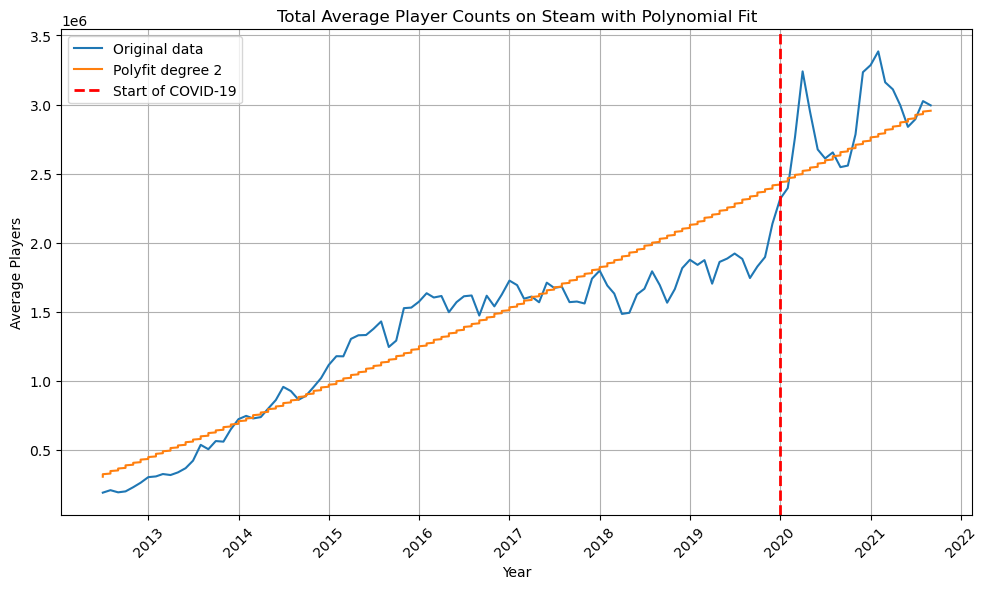

In [12]:
date_min = summary['Date'].min()
summary['Months_Since_Start'] = (summary['Date'] - date_min) / np.timedelta64(1, 'D') / 30.44
x = summary['Months_Since_Start'].values
y = summary['Avg_players'].values

# Fit a polynomial of degree 2
degree = 2
coeffs = np.polyfit(x, y, degree)

# Create a polynomial function with the obtained coefficients
poly_func = np.poly1d(coeffs)

# For plotting or predictions, create x values and apply the polynomial function
x_fit = np.linspace(x.min(), x.max(), 500)  # Adjust according to your needs
y_fit = poly_func(x_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(summary['Date'], summary['Avg_players'], '-', label='Original data')
plt.plot(summary['Date'].iloc[x_fit.astype(int)], y_fit, '-', label=f'Polyfit degree {degree}')
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', lw=2, label='Start of COVID-19')
plt.title('Total Average Player Counts on Steam with Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Average Players')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation of Initial Regression
Using a degree of 3 with polyfit the regression is perfectly fit and shows a nearly linear line.

## 1.7 Extending Polynomial Regression for 3-Year Future Prediction
### Methodology and Objective of Future Prediction

The objective of extending our polynomial regression model to forecast future trends is to provide actionable insights into the potential growth and dynamics of the video game industry over the next 3 years. This analysis assists industry stakeholders in understanding long-term trends, aiding in strategic planning and investment decisions.

To predict future player engagement, we extended the existing polynomial regression model to forecast the summed average player counts for a period of 3 years beyond the last recorded data point.

The future time frame was quantified as 36 months (3 years) beyond the current dataset’s timeframe. This extension is aimed at projecting long-term trends in the video game industry’s player engagement. A series of computational steps were followed to implement this predictive analysis:

    Defining the Future Time Frame: We extended our analysis by defining a future projection that spans 120 months beyond the latest data point available in our dataset. This period was chosen to provide insights into potential long-term trends and their implications for the video game industry.

    Generating Future Data Points: To facilitate this extension, a new series of monthly data points was generated to span from the last known data point to the 3-year future endpoint. These data points form the foundation of our predictions.

    Converting Months into Dates: For ease of visualization and to enhance interpretability, the calculated months since the start of the dataset were converted back into date format.

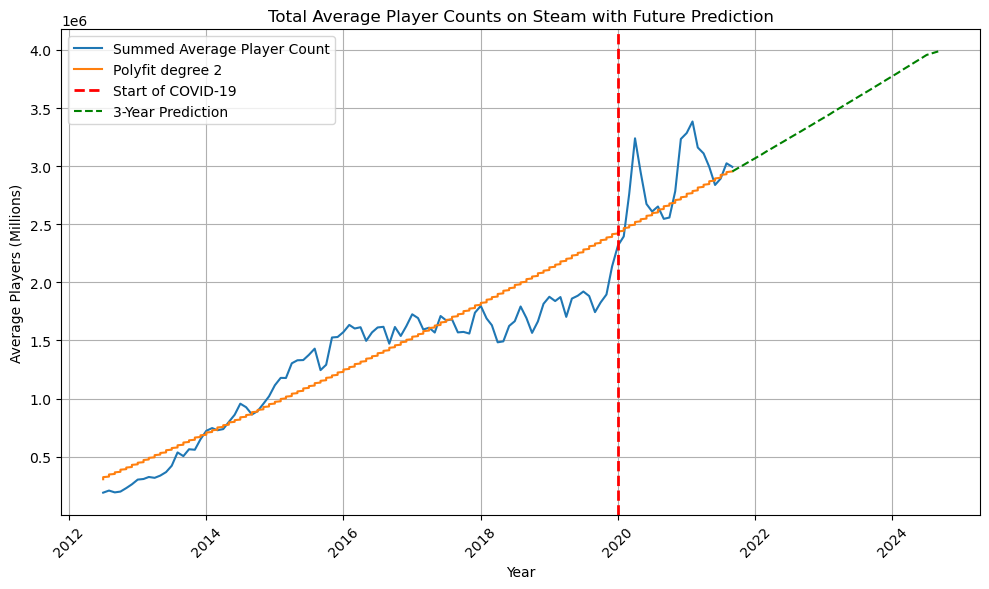

In [13]:
# Calculate the endpoint for 3 years into the future in terms of months since the start
months_into_future = 36
x_future_end = x.max() + months_into_future

# Generate new x values for the future prediction
x_future = np.linspace(x.max(), x_future_end, months_into_future)
y_future = poly_func(x_future)

# Convert future x values back to dates for plotting
future_dates = [date_min + pd.DateOffset(months=int(m)) for m in x_future]

# Plot the original data, current fit, and future prediction
plt.figure(figsize=(10, 6))
plt.plot(summary['Date'], summary['Avg_players'], '-', label='Summed Average Player Count')
plt.plot(summary['Date'].iloc[x_fit.astype(int)], y_fit, '-', label=f'Polyfit degree {degree}')
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', lw=2, label = 'Start of COVID-19')
plt.plot(future_dates, y_future, 'g--', label='3-Year Prediction')
plt.title('Total Average Player Counts on Steam with Future Prediction')
plt.xlabel('Year')
plt.ylabel('Average Players (Millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Interpretation
Working off of the regression from 1.6, this graph shows a rough 3-year prediction of the total average players across the top 100 Steam games. Using any degree higher than 2 proved to more closely map the data, but of course it caused the regression to _overfit_ and the prediction became wild and unrealistic. 

## 1.8 Looking at Industry Revenue Data

### Methodology:

The aim of this analysis is to explore a possible correlation between COVID-19 pandemic developments and revenue trends within the video game industry. This exploration will consist of several key steps, employing a variety of data science techniques and tools to ensure a thorough investigation.

We will employ a Difference-in-Differences analysis in order to determine the change that COVID-19's occurence may have had on the total revenue. This will be performed by splitting the data at pre-treatment and post-treatment, where the treatment is the occurence of COVID-19 in January of 2020. A prediction will be produced based on a regression of the pre-treatment data, and it will be compared to the real data post-treatment. The difference in between the two lines (if any) will allow us to see COVID-19's potential effect on the industry's revenue. 

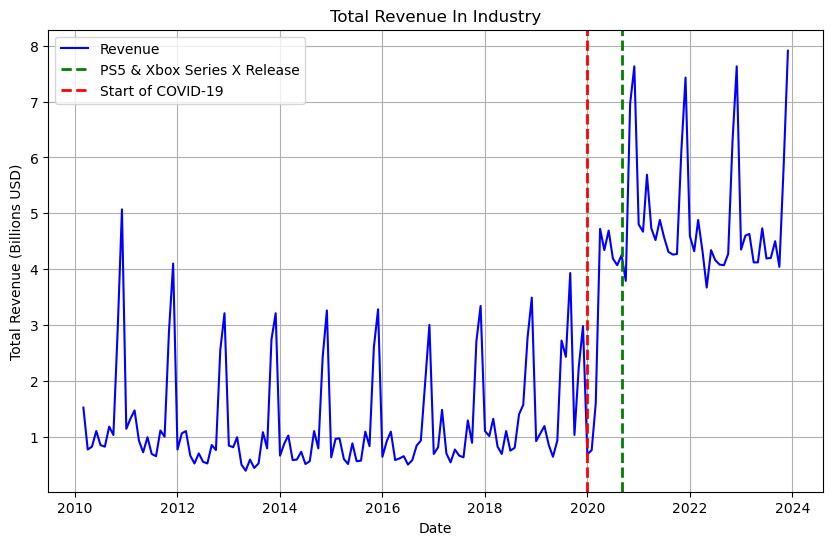

In [14]:
revDate = pd.to_datetime(revenue['month_year'], format='mixed')
plt.figure(figsize=(10, 6))
plt.plot(revDate, revenue['Total'], label='Revenue', color='blue')
plt.axvline(pd.to_datetime('2020-09-01'), color='green', linestyle='--', lw=2, label = 'PS5 & Xbox Series X Release')
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', lw=2, label = 'Start of COVID-19')
plt.title('Total Revenue In Industry')
plt.xlabel('Date')
plt.ylabel('Total Revenue (Billions USD)')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation 

For an unknown reason, there is a huge sustained spike in spending across the industry the moment COVID-19 began. It can be seen throughout the graph that there are huge spikes in the last quarter of every year. This is most certainly due to holiday shopping. 

## 1.9 Bringing in COVID-19 Data

### Methodology: Analyzing the Correlation Between COVID-19 Case Numbers and Video Game Player Counts

The objective of this analysis is to determine if there is a statistically significant correlation between the number of COVID-19 cases and the engagement levels in video games. This study seeks to understand if increases in COVID-19 cases, indicative of more stringent lockdown measures and potentially increased free time, correspond to increased player activity within the video game industry.

To explore this potential correlation, we have integrated a dataset detailing the number of confirmed COVID-19 cases over time with our dataset tracking average video game player counts over the same period. Both datasets have been aligned based on the date to ensure that the comparison of data points is consistent and relevant.

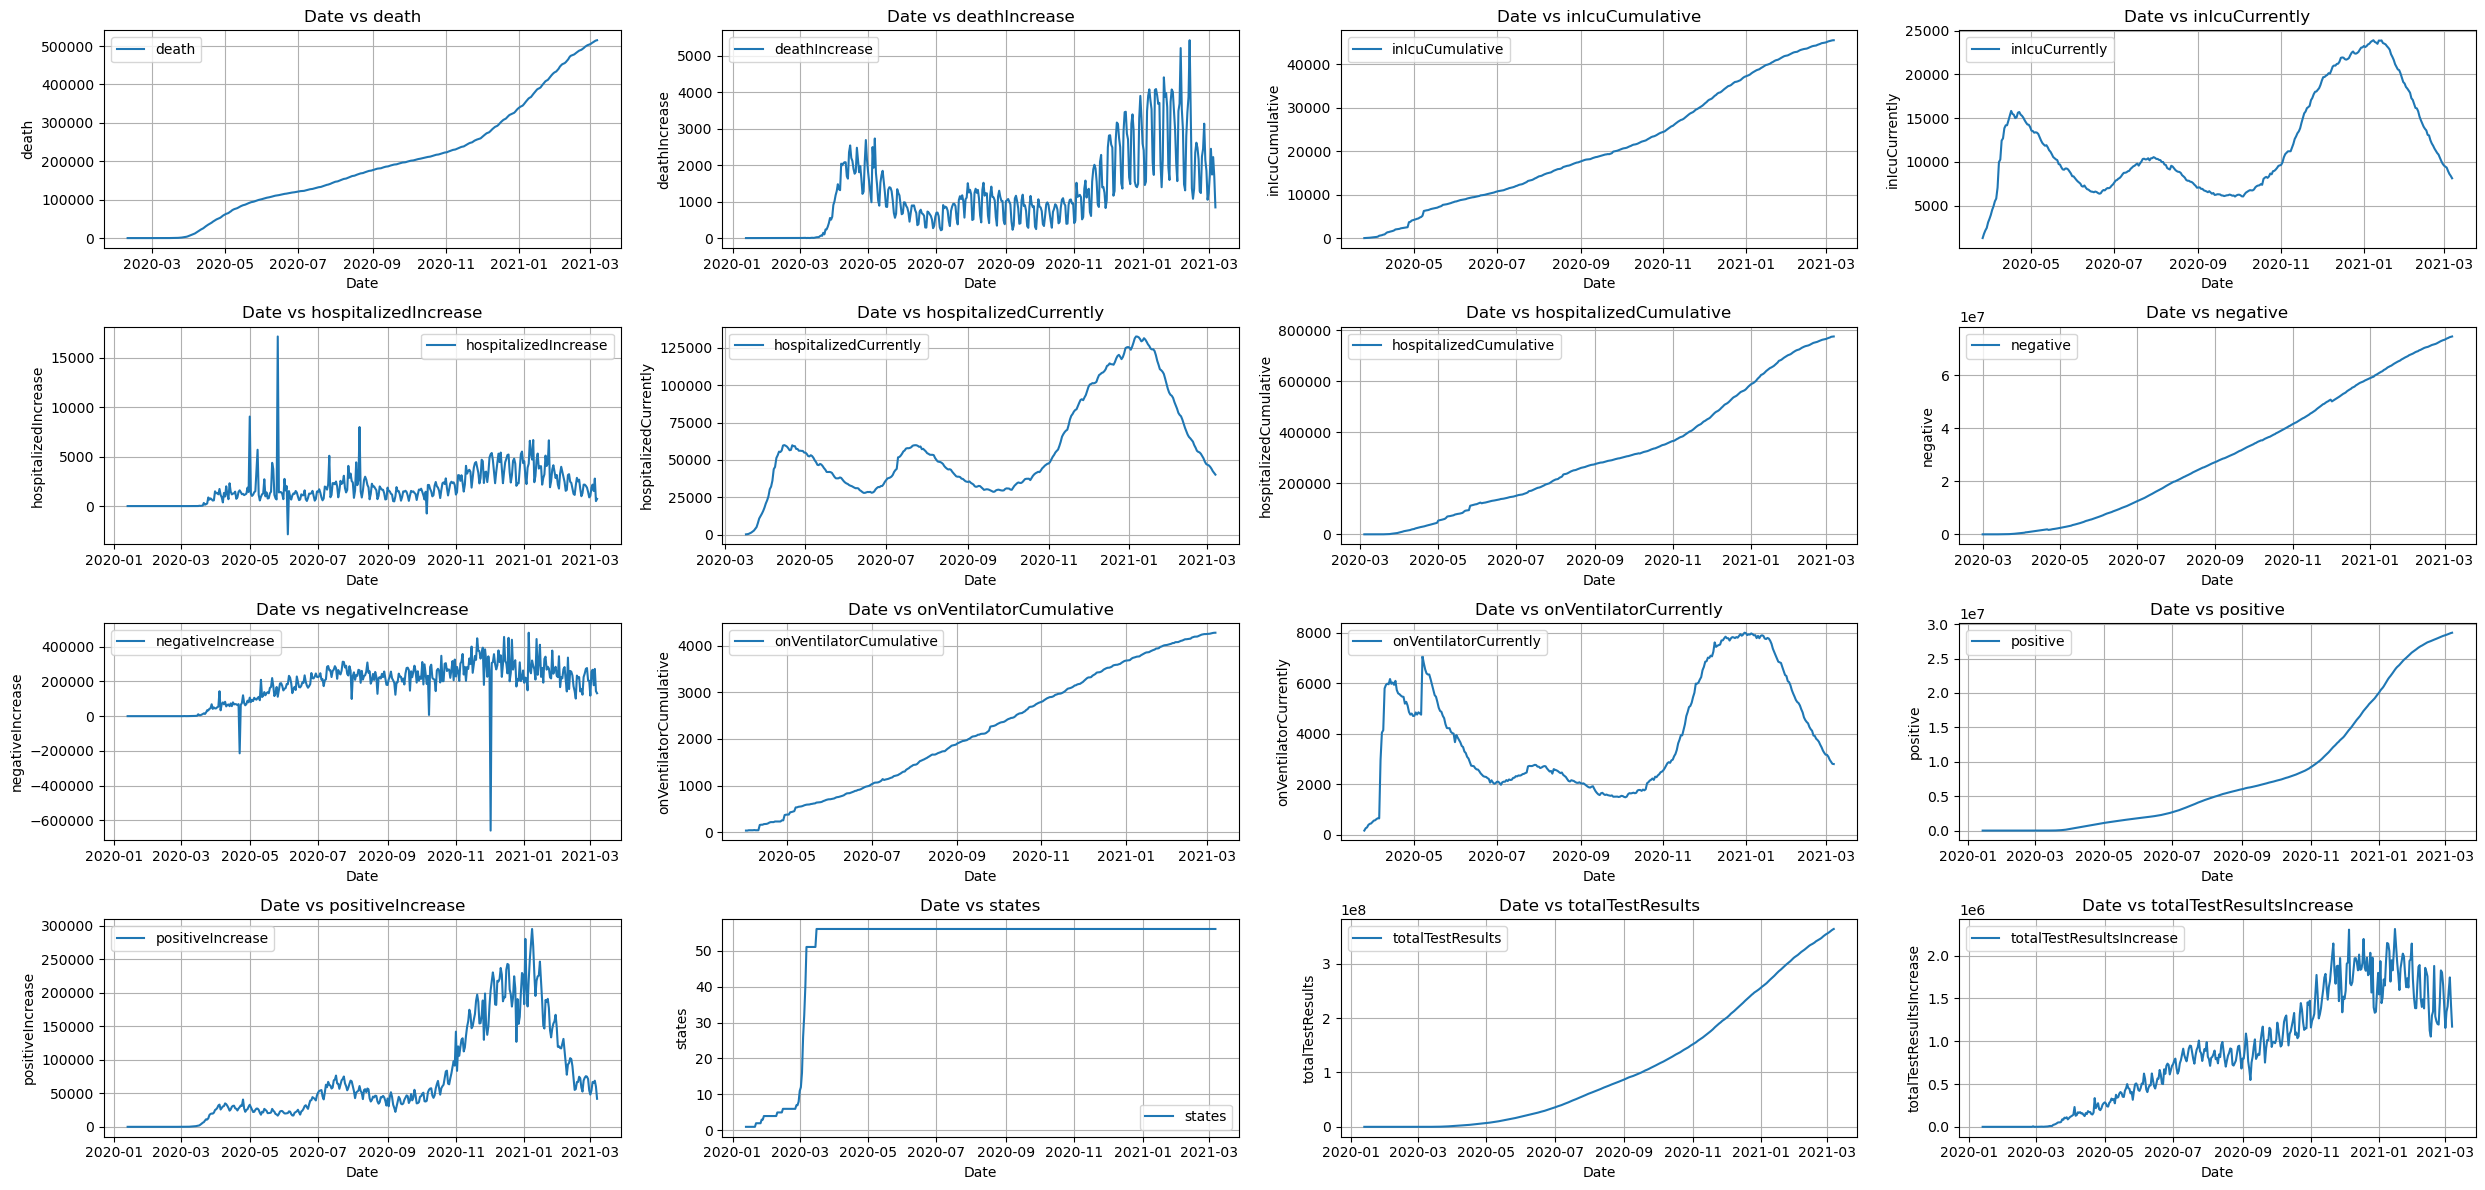

In [15]:
covid_data = pd.read_csv('covid_data.csv', delimiter = ',')
covid_data['date'] = pd.to_datetime(covid_data['date'])
# Number of subplots needed (one for each column except 'Date')
num_columns = len(covid_data.columns) - 1
fig, axs = plt.subplots(4, 4, figsize=(25, 12))  # Adjust sizing as needed

axs = axs.flatten()

ax_idx = 0

for column in covid_data.columns:
    if column != 'date':  # Skip the 'Date' column to avoid date vs date plotting
        axs[ax_idx].plot(covid_data['date'], covid_data[column], label=column)
        axs[ax_idx].set_title(f'Date vs {column}')
        axs[ax_idx].set_xlabel('Date')
        axs[ax_idx].set_ylabel(column)
        axs[ax_idx].grid(True)
        axs[ax_idx].legend()
        ax_idx += 1

plt.tight_layout()
plt.show()

### Interpretation
The above subplot is a display of all of the COVID-19 data available in the dataset. This includes observations such as amount of positive tests, positive increase, amount hospitalized, amount on ventilators etc...

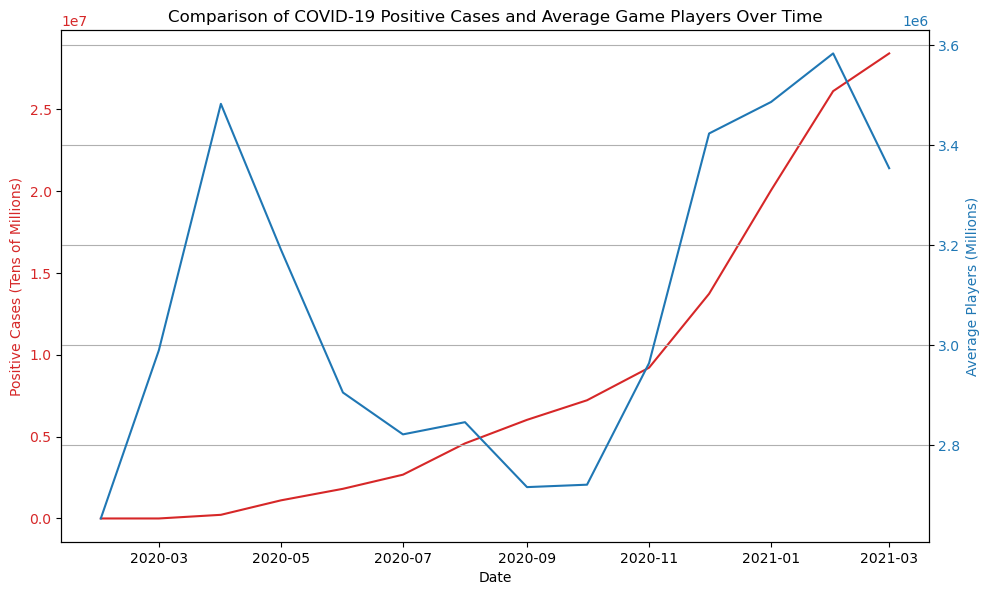

In [16]:
# Load the datasets again, had issues working with the data
valve_data = pd.read_csv('valve.csv', delimiter=',')
covid_data = pd.read_csv('covid_data.csv', delimiter=',')

# Convert date columns to datetime format - making sure it is always in the correct format
covid_data['date'] = pd.to_datetime(covid_data['date'])
valve_data['Date'] = pd.to_datetime(valve_data['Date'])

# Merge the datasets on the date column
merged_data = pd.merge(covid_data[['date', 'positive']], valve_data[['Date', 'Avg_players']], left_on='date', right_on='Date', how='inner')

# Summarize average players across all games
merged_data_summary = merged_data.groupby('date').agg({
    'positive': 'first',
    'Avg_players': 'sum'
}).reset_index()

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Positive Cases (Tens of Millions)', color=color)
ax1.plot(merged_data_summary['date'], merged_data_summary['positive'], color=color )
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Players (Millions)', color=color)
ax2.plot(merged_data_summary['date'], merged_data_summary['Avg_players'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.grid(True)
plt.title('Comparison of COVID-19 Positive Cases and Average Game Players Over Time')
plt.show()

### Interpretation of Average Players vs Positive Test Cases Over Time
The above graph does not tell us too much. Just by plotting Average Players against Positive COVID-19 cases does not give us any causality. So a coefficient test of the both sets of data must performed.

In [17]:
valve_data = pd.read_csv('valve.csv')
covid_data = pd.read_csv('covid_data.csv')

# Convert dates to datetime format
valve_data['Date'] = pd.to_datetime(valve_data['Date'])
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Sum the average players for each date
summed_valve_data = valve_data.groupby('Date')['Avg_players'].sum().reset_index()

# Set date as index and reindex to fill dates, then linearly interpolate
summed_valve_data.set_index('Date', inplace=True)
all_dates = pd.date_range(start=summed_valve_data.index.min(), end=summed_valve_data.index.max(), freq='D')
interpolated_valve_data = summed_valve_data.reindex(all_dates).interpolate('linear').reset_index().rename(columns={'index': 'Date'})

# Merge datasets on dates
merged_data = pd.merge(covid_data[['date', 'positive']], interpolated_valve_data, left_on='date', right_on='Date', how='inner')
merged_data_summary = merged_data.groupby('date').agg({'positive': 'first', 'Avg_players': 'sum'}).reset_index()

# Replace any NaN values with zeros
merged_data_summary.fillna(0, inplace=True)

# Perform Pearson Correlation
correlation, p_value = stats.pearsonr(merged_data_summary['Avg_players'], merged_data_summary['positive'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)
for i in range(3):
    print('\n')
# Fit Linear Regression Model
X = merged_data_summary['positive'].values.reshape(-1, 1)  # Positive cases as the independent variable
y = merged_data_summary['Avg_players'].values  # Average players as the dependent variable
X = sm.add_constant(X) #constant for the model

# Create the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

Pearson Correlation Coefficient: 0.6498281766128974
P-value: 9.470049927626045e-52






                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     305.5
Date:                Tue, 07 May 2024   Prob (F-statistic):           9.47e-52
Time:                        13:34:49   Log-Likelihood:                -5780.8
No. Observations:                 420   AIC:                         1.157e+04
Df Residuals:                     418   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

### Interpretation of Pearson Test and Regression Model

A Pearson correlation coefficient of 0.649 can be considered to represent a moderately strong positive relationship between the Average Players and the Positive Test Cases. This correlation does not imply causation. It simply means that the two variables tend to move together in some way. Whether one causes the other, or whether both are influenced by other factors, cannot be determined from this statistic alone. 

From the regression, it finds that a one unit increase in positive case count results in a 0.02 increase in the estimation of Average players. This is interesting; essentially saying that it takes 50 positive test cases to cause a one unit increase in Average Player Count.

## 2.0 Difference-in-Differences Analysis on Valve Dataset

### Methodology: 
This aims to estimate the impact of the COVID-19 pandemic on the video game industry, particularly on the player engagement metrics for the top games on Steam. We employ a Difference-in-Differences (DiD) analysis, a quasi-experimental design used to infer causal relationships under conditions that approximate a controlled experiment.

Analysis Phases

    Phase 1 - Pre-intervention Trend Analysis:
        Data Segregation: Split the data into pre- and post-intervention periods.
        Trend Estimation: Fit a linear regression model to the pre-intervention data to establish the baseline trend. The independent variable is the number of days since the start of the period, and the dependent variable is the average player counts.

    Phase 2 - Intervention Impact Analysis:
        Prediction: Use the model developed in Phase 1 to predict player counts in the post-intervention period, assuming no pandemic had occurred.
        Comparison: Compare these predictions with the actual player counts observed during the post-intervention period to assess deviations attributable to the pandemic.

    Statistical Assessment:
        Residual Calculation: Compute the residuals by subtracting the predicted counts (if the pandemic had not occurred) from the actual counts during the post-intervention period.
        Effect Estimation: Analyze these residuals to estimate the average impact of the pandemic on player engagement. This involves calculating the mean of the residuals, providing a measure of the overall effect of COVID-19.

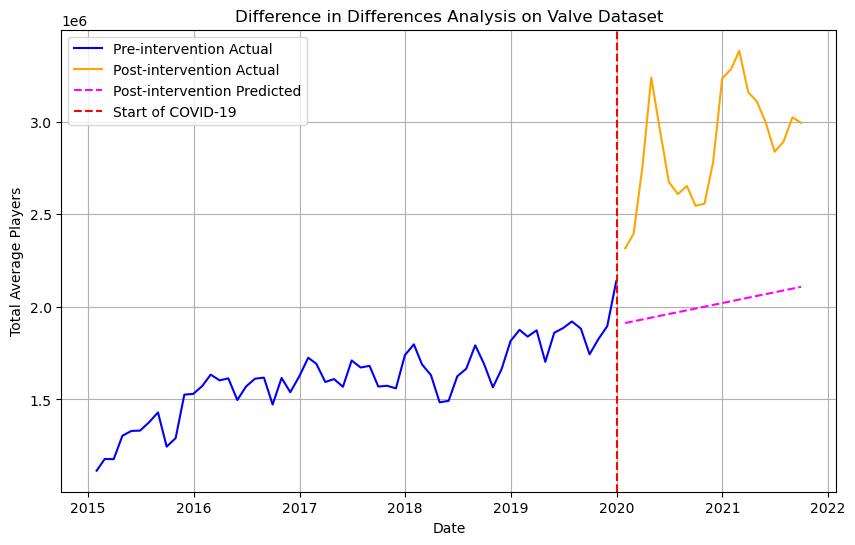

Estimated effect of COVID-19 on Average Players:  865924.57


In [18]:
# Load the dataset
valve_data = pd.read_csv('valve.csv')
valve_data = valve_data[valve_data['Game_Name'] != 'PUBG: Battlegrounds']
# Ensure the 'Date' column is a datetime type
valve_data['Date'] = pd.to_datetime(valve_data['Date'])

# Filter data from January 2015 onward and sum the average players by month
valve_data = valve_data[valve_data['Date'] >= '2015-01-01']
monthly_data = valve_data.groupby(pd.Grouper(key='Date', freq='M'))['Avg_players'].sum().reset_index()

# Split the data into pre and post January 2020
pre_intervention = monthly_data[monthly_data['Date'] < '2020-01-01']
post_intervention = monthly_data[monthly_data['Date'] >= '2020-01-01']

# Fit a linear regression model on pre-intervention data
X_pre = np.array((pre_intervention['Date'] - pre_intervention['Date'].min()).dt.days).reshape(-1, 1)  # Day count as independent variable
y_pre = pre_intervention['Avg_players'].values

model = LinearRegression()
model.fit(X_pre, y_pre)

# Predict the post-intervention data using the pre-intervention model
X_post = np.array((post_intervention['Date'] - pre_intervention['Date'].min()).dt.days).reshape(-1, 1)
y_pred_post = model.predict(X_post)

# Calculate residuals as the difference between actual and predicted post-intervention data
residuals = post_intervention['Avg_players'].values - y_pred_post

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pre_intervention['Date'], y_pre, label='Pre-intervention Actual', color='blue')
plt.plot(post_intervention['Date'], post_intervention['Avg_players'], label='Post-intervention Actual', color='orange')
plt.plot(post_intervention['Date'], y_pred_post, label='Post-intervention Predicted', color='magenta', linestyle='--')
plt.title('Difference in Differences Analysis on Valve Dataset')
plt.xlabel('Date')
plt.ylabel('Total Average Players')
plt.axvline(x=pd.to_datetime('2020-01-01'), color='red', linestyle='--', label='Start of COVID-19')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the average difference (effect size)
effect_size = np.mean(residuals)
print("Estimated effect of COVID-19 on Average Players: ", round(effect_size, 2))

### Interpretation of DiD on Summed Average Players

Using a linear regression, the graph above regresses over pre-treatment and compares it to post-treatment, where treatment is the occurence of COVID-19. This graph shows there is a slight peak as COVID-19 was beginning. Player activity then returns to the linear prediction, and peaks again during the winter 2021 outbreak. To say that this is definitively caused by COVID-19 is not possible yet. However this graph serves as a sign that it is worthy of further investigation, with the estimated effect of COVID-19's occurence on Average Players being approximately 850,000.

## 2.1 Difference-in-Differences on Industry Revenue Dataset
### Explanation of SARIMA Model and it's Parameters
The Seasonal AutoRegressive Integrated Moving Average (SARIMA) model is a sophisticated statistical tool used for forecasting time series data that exhibits seasonal variations. It extends the ARIMA model by incorporating seasonal elements alongside non-seasonal components, characterized by the parameters pp, dd, qq for the non-seasonal part and PP, DD, QQ, with mm indicating the number of periods in a season. The model is particularly adept at handling data where trends and seasonality are prevalent, such as monthly sales or daily temperature readings. By using the auto_arima function, the model automatically selects the best combination of these parameters based on the data's characteristics, optimizing for the lowest information criteria, which balances the trade-off between model complexity and fit. This adaptability makes SARIMA an excellent choice for predictive modeling where accuracy and responsiveness to data patterns are crucial.

A SARIMA model is characterized by several parameters: (p,d,q)×(P,D,Q)s(p,d,q)×(P,D,Q)s​, where:

    p: The number of autoregressive terms (AR).
    d: The degree of differencing (the number of times the data have had past values subtracted).
    q: The number of moving average terms (MA).
    P: The number of seasonal autoregressive terms.
    D: The degree of seasonal differencing.
    Q: The number of seasonal moving average terms.
    s: The length of the seasonal cycle.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=141.767, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=325.252, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=236.205, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=445.734, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=239.779, Time=0.41 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=131.670, Time=0.84 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=306.928, Time=0.14 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=133.399, Time=1.37 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=134.858, Time=1.68 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=133.287, Time=0.26 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=144.983, Time=0.47 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=133.607, Time=0.67 sec
 ARIMA(2,0,3)(1,0,0)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AI

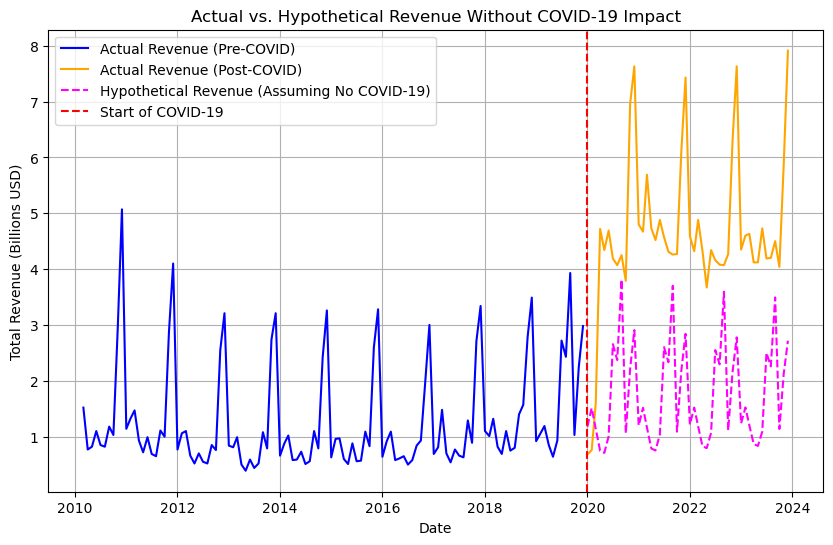

Estimated effect of COVID-19 on Total Revenue using SARIMA: $ 2.86 billion dollars


In [19]:
data = pd.read_csv('monthly_revenue.csv')
data['month_year'] = pd.to_datetime(data['month_year'], format='mixed')
data.set_index('month_year', inplace=True)
data = data['Total'].dropna()

# Split data into training and testing sets
train = data[:'2019-12-31']
test = data['2020-01-01':]

# Fit the model using auto_arima to automatically determine p, d, q, and seasonal parameters
model = auto_arima(train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
model.summary()
# Forecast future values (post-COVID prediction)
future_pred = model.predict(n_periods=len(test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Actual Revenue (Pre-COVID)', color='blue')  # Actual pre-COVID data
plt.plot(test.index, test.values, label='Actual Revenue (Post-COVID)', color='orange')  # Actual post-COVID data
plt.plot(test.index, future_pred, label='Hypothetical Revenue (Assuming No COVID-19)', linestyle='--', color='magenta')  # Predictions for post-COVID
plt.axvline(x=pd.to_datetime('2020-01-01'), color='red', linestyle='--', label='Start of COVID-19')
plt.title('Actual vs. Hypothetical Revenue Without COVID-19 Impact')
plt.xlabel('Date')
plt.ylabel('Total Revenue (Billions USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate residuals as the difference between actual and predicted post-intervention data
residuals = test.values - future_pred

# Calculate and print the average difference (effect size)
effect_size = np.mean(residuals)
print("Estimated effect of COVID-19 on Total Revenue using SARIMA: $", round(effect_size, 2), "billion dollars") 

### Interpretation of DiD on Revenue
This DiD analysis provides a compelling view of the economic impact of COVID-19 on the video game industry, particularly focusing on the discrepancy between expected (predicted) revenue trajectories based on historical pre-COVID data and the actual revenues observed post-COVID. The SARIMA model, utilized here for its ability to account for seasonal variations and autoregressive components in time series data, estimated a significant divergence of approximately $2.9 billion between the predicted and actual revenues.

While the analysis suggests a strong association between the pandemic timeline and revenue changes, it is crucial to acknowledge that this does not definitively prove causality. The model does not account for other concurrent economic factors or industry-specific disruptions that may have contributed to these changes. However, the alignment of timing suggests a notable correlation worth further exploration.

## Conclusion

The research conducted aimed to elucidate the effects of the COVID-19 pandemic on the video game industry, with a particular focus on consumer spending habits and preferences. The statistical analyses deployed, including Pearson correlation, Difference in Difference analyses, and a Seasonal ARIMA model, provided a comprehensive examination of the available data. Despite these rigorous analytical efforts, the results present a complex picture that does not definitively confirm a direct causative impact of COVID-19 on the fundamental dynamics of the video game industry. However, the findings unambiguously indicate that the pandemic has significantly influenced consumer economic behavior and spending preferences.

The correlation analysis suggested a moderate relationship between the spread of the virus and changes in video game playing patterns, implying an association rather than causation. Meanwhile, the SARIMA forecast model highlighted deviations in actual revenue against the projected figures without the pandemic, suggesting notable economic impacts. These deviations were quantitatively substantiated through the calculation of effect sizes, which demonstrated substantial differences between expected and observed spending in the video game sector during the pandemic period.

This investigation confirms that while it is challenging to isolate the effects of COVID-19 from other concurrent economic factors impacting consumer spending, the pandemic has undoubtedly reshaped consumer preferences and influenced spending habits. The increased engagement with video games during lockdown periods suggests a shift towards digital entertainment, possibly propelled by the restrictions on outdoor activities and other forms of social interaction. The industry might need to adapt to a potentially enduring increase in demand for digital entertainment solutions and explore innovative approaches to consumer engagement and monetization.

Further research should continue to monitor these trends as the global situation evolves and more data become available. Longitudinal studies would be particularly valuable to determine if these changes represent a temporary response to the pandemic or a permanent shift in the entertainment landscape.

## References:

ChatGPT 4.0, https://chat.openai.com , last accessed Friday, April 12, 2024. - most code has been passed through ChatGPT in order to work out bugs. Some sections are made entirely by ChatGPT. Some methods that we did not learn in class were suggested by ChatGPT (ex. SARIMA Model) and so I taught myself about them through ChatGPT 4.0.

Valve Dataset: https://www.kaggle.com/code/puwatermnuphan/steam-player-analytics-report

Twitch Dataset: https://www.statista.com/statistics/819967/time-spent-watching-twitch/

Video Game Industry Revenue Dataset: https://www.statista.com/statistics/201073/revenue-of-the-us-video-game-industry-by-segment/

COVID-19 Dataset: https://health.google.com/covid-19/open-data/raw-data